In [66]:
import numpy as np
import pandas as pd

In [67]:
train = pd.read_csv("dataset/train.csv").set_index("id")
test = pd.read_csv("dataset/test.csv").set_index("id")

In [68]:
train.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [69]:
train.head(print(train.shape))

(20758, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II


In [70]:
target = train["NObeyesdad"]
train = train.drop("NObeyesdad", axis="columns")

In [71]:
sorted_labels = ['Insufficient_Weight', 'Normal_Weight', 
 'Overweight_Level_I', 'Overweight_Level_II', 
 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

In [72]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, sorted_labels):
        self.classes_ = sorted_labels
        self.label_to_numeric_mapping = None

    def fit(self, y):
        self.label_to_numeric_mapping = {label: numeric for numeric, label in enumerate(self.classes_)}
        return self

    def transform(self, y):
        if self.label_to_numeric_mapping is None:
            raise ValueError("fit method must be called before transform")
        return y.map(self.label_to_numeric_mapping)

    def inverse_transform(self, y):
        if self.label_to_numeric_mapping is None:
            raise ValueError("fit method must be called before inverse_transform")
        return pd.Series(y).map({numeric: label for label, numeric in self.label_to_numeric_mapping.items()})

In [73]:
target_encoder = CustomLabelEncoder(sorted_labels)
target_encoder.fit(target)
target_numeric = target_encoder.transform(target)

In [74]:
train.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [75]:
test.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [76]:
train.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
dtype: object

In [77]:
categorical_features = train.columns[train.dtypes=="object"].tolist()
numeric_features = train.columns[train.dtypes!="object"].tolist()

In [78]:
train[categorical_features].nunique()

Gender                            2
family_history_with_overweight    2
FAVC                              2
CAEC                              4
SMOKE                             2
SCC                               2
CALC                              3
MTRANS                            5
dtype: int64

In [79]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoder.fit(pd.concat([train[categorical_features], test[categorical_features]], axis=0))

train_encoded = encoder.transform(train[categorical_features])
train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(categorical_features))

In [80]:
test_encoded = encoder.fit_transform(test[categorical_features])
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(categorical_features))

In [81]:
train_sum = train_encoded_df.sum(axis=0).astype(int)
test_sum = test_encoded_df.sum(axis=0).astype(int)

sum_df = pd.concat([train_sum, test_sum], axis=1, keys=['Train', 'Test'])
sum_df

,Train,Test
Gender_Female,10422,6965
Gender_Male,10336,6875
family_history_with_overweight_no,3744,2456
family_history_with_overweight_yes,17014,11384
FAVC_no,1776,1257
FAVC_yes,18982,12583
CAEC_Always,478,359
CAEC_Frequently,2472,1617
CAEC_Sometimes,17529,11689
CAEC_no,279,175


In [82]:
train = pd.concat([train.drop(categorical_features, axis=1), train_encoded_df], axis=1)
test = pd.concat([test.drop(categorical_features, axis=1), test_encoded_df], axis=1)

In [83]:
train['BMI'] = train['Weight'] / (train['Height'] ** 2)
test['BMI'] = test['Weight'] / (test['Height'] ** 2)

In [84]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(5, shuffle=True, random_state=0)
cv_splits = cv.split(train, y=target_numeric)

In [85]:
list(cv_splits)

[(array([    0,     1,     2, ..., 20755, 20756, 20757]),
  array([   15,    24,    27, ..., 20740, 20741, 20754])),
 (array([    2,     3,     4, ..., 20755, 20756, 20757]),
  array([    0,     1,     7, ..., 20748, 20750, 20752])),
 (array([    0,     1,     2, ..., 20754, 20756, 20757]),
  array([   10,    22,    23, ..., 20728, 20732, 20755])),
 (array([    0,     1,     2, ..., 20752, 20754, 20755]),
  array([    3,     4,     6, ..., 20753, 20756, 20757])),
 (array([    0,     1,     3, ..., 20755, 20756, 20757]),
  array([    2,     5,    14, ..., 20746, 20749, 20751]))]

In [86]:
%%time

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score
from xgboost import XGBClassifier

xgb = XGBClassifier(booster='gbtree',
                    device = "cuda",
                    tree_method="hist",
                    objective='multi:softmax',
                    num_class=len(set(target_numeric)),
                    n_estimators=300,
                    max_depth=6,
                    verbosity=0)

cv_splits = cv.split(train, y=target_numeric)
scorer = make_scorer(accuracy_score)

cv_results = cross_validate(xgb, train, target_numeric, cv=cv_splits, scoring=scorer, return_train_score=False)

accuracy_mean = cv_results['test_score'].mean()
print(f'Cross-validated Accuracy: {accuracy_mean:.3f}')

Cross-validated Accuracy: 0.901
CPU times: user 57.3 s, sys: 20.2 s, total: 1min 17s
Wall time: 7.63 s


In [87]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

cv_splits = cv.split(train, y=target_numeric)
cv_cls_preds = cross_val_predict(xgb, train, target_numeric, cv=cv_splits)

In [88]:
print(classification_report(y_true=target_numeric, y_pred=cv_cls_preds, target_names=target_encoder.classes_))

                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.93      0.93      2523
      Normal_Weight       0.87      0.88      0.87      3082
 Overweight_Level_I       0.80      0.77      0.78      2427
Overweight_Level_II       0.80      0.82      0.81      2522
     Obesity_Type_I       0.89      0.88      0.88      2910
    Obesity_Type_II       0.97      0.97      0.97      3248
   Obesity_Type_III       1.00      1.00      1.00      4046

           accuracy                           0.90     20758
          macro avg       0.89      0.89      0.89     20758
       weighted avg       0.90      0.90      0.90     20758



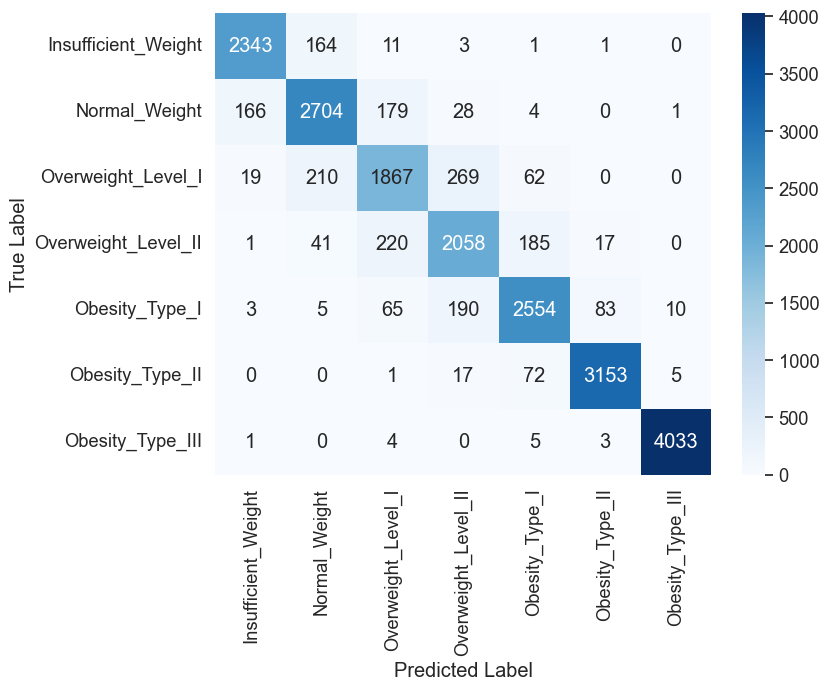

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=target_numeric, y_pred=cv_cls_preds)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) 
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()